In [2194]:
import warnings
warnings.filterwarnings('ignore')

import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.linear_model import LinearRegression

In [2195]:
df = pd.read_csv("../data/CarPrice_Assignment.csv",index_col="car_ID")

#### Problem Statement
A French automobile company VOX aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US   counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the European market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

#### Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market

## Data - Data Cleaning - Data Preparation

In [2196]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2197]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#### Gather information about dataset

In [2198]:
print(f'Our dataset has {df.shape[0]} row (data) and {df.shape[1] - 1} features and the target is the price {df.shape[1]} columns')

Our dataset has 205 row (data) and 24 features and the target is the price 25 columns


In [2199]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [2200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

The data provided is a mixed of categorical, numerical values and ordinal value

#### Check for null valuess

In [2201]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Our data has no null values

The goal of this project is to know if we can introduce a new car  to the market, so the invidual name of the car is not really useful but the brand of the car is and the characteristic of it

In [2202]:
df = df.rename(columns={"CarName":"CompanyName"})
df["CompanyName"] = df["CompanyName"].apply(lambda x : x.split(" ")[0])

In [2203]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

From the unique values we can see many car names spelled wrong such as
  - nissan $\neq$ Nissan
  - porsche $\neq$ porcshe
  - toyota $\neq$ toyouta
  - volkswagen $\neq$ vokswagen $\neq$ vw

In [2204]:
def replace_name(df,old,new):
    # Multiple ways to do this such as df.CompanyName.replace(old,new)
    # I want to test lambda function
    df["CompanyName"] = df["CompanyName"].apply(lambda x : new if x == old else x)
    return df
    

In [2205]:
df = replace_name(df,"Nissan","nissan")
df = replace_name(df,"porcshce","porsche")
df = replace_name(df,"maxda","mazda")
df = replace_name(df,"toyouta","toyota")
df = replace_name(df,"vokswagen","volkswagen")
df = replace_name(df,"vw","volkswagen")

In [2206]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Data Analysis

#### Price

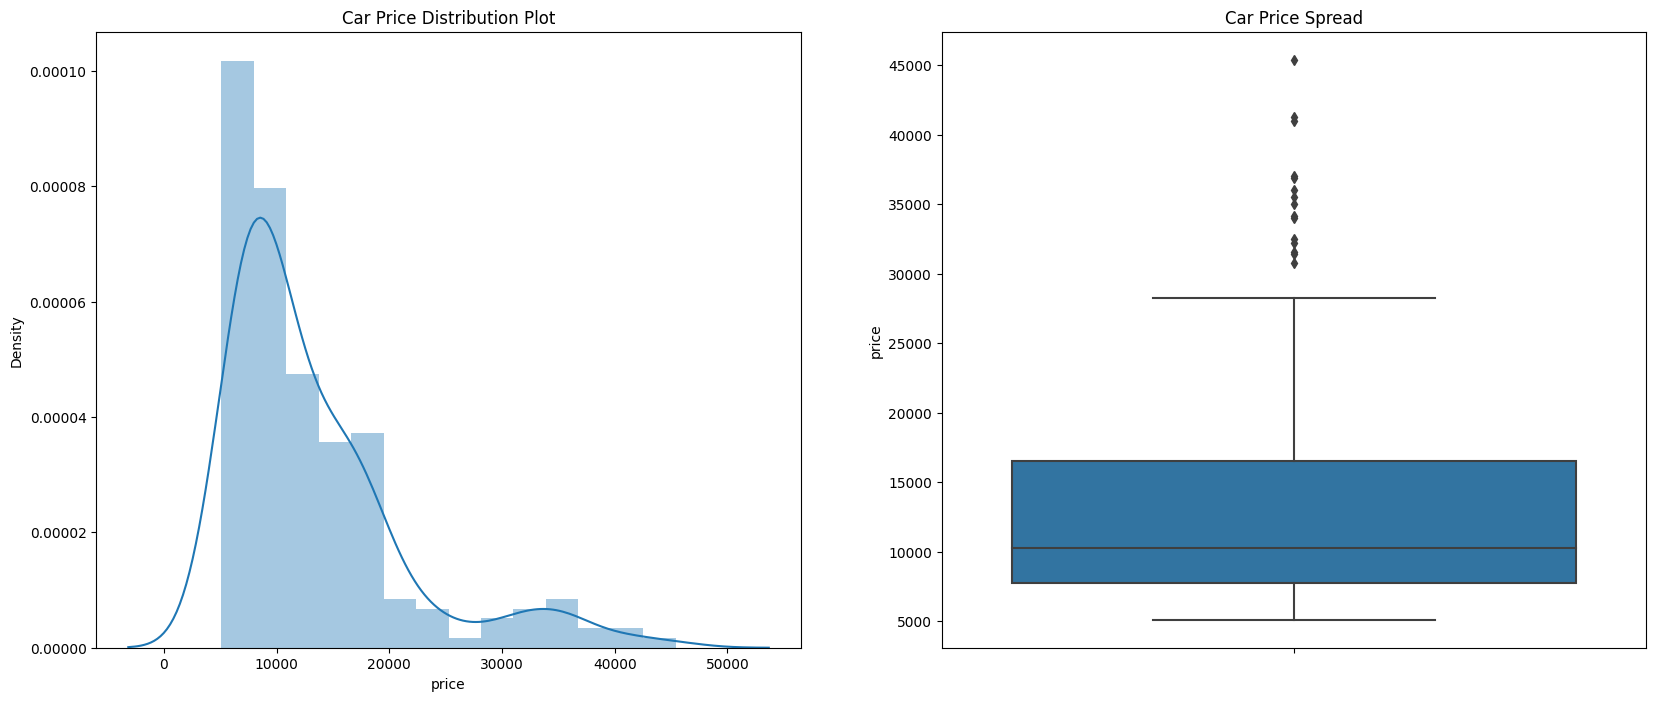

In [2207]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df["price"])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df["price"])

plt.show()

In [2208]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<ol>
    <li>
    We can see that the bell curve is skewed to the right, most of the values are low
    </li>
    <li> 
    Our data varies a lot, most of our data are between 7788 and 16503 while the maximum value is 45400
    </li>
    <li> There is a difference between our mean (13276,) and the median (10295) which is logic, our bell curved is skewed to the right, and most of our data is between Q1 (25%) and Q3 (75%) but due to the high variance in our data and the outliers observed in the boxplot the mean is higher by 3000 
</ol>

Our data has mostly low values but contains outlier. I will demonstrate how many values are considered outliers (values outside the interval \[Q1 - 1.5 * IQR, Q3 + 1.5 * IQR\]

In [2209]:
def find_outliers(df,coeff):
    
    Q1 = np.quantile(df["price"],0.25)
    Q3 = np.quantile(df["price"],0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - coeff*Q1
    upper_bound = Q3 + coeff*Q3
    df_outlier = df["price"].apply(lambda x: x if x > upper_bound or x<lower_bound else None)
    df_outlier = df_outlier.dropna()
    return df_outlier
    

In [2210]:
df_outlier = find_outliers(df,1.2)
df = df.drop(index=list(df_outlier.index))

This step can be used as a preprocessing step later on to build our model, we can modify the coeff attribute to catch more outliers and see if it affect our model

### Analyze categorical data

<ul>
    <li> CompanyName </li>
    <li> Symboling </li>
    <li> fueltype </li>
    <li> enginetype </li>
    <li> carbody </li>
    <li> doornumber </li>
    <li> enginelocation </li>
    <li> fuelsystem </li>
    <li> cylindernumber</li>
    <li> aspiration </li>
    <li> drivewheel </li>
</ul>

<AxesSubplot: ylabel='carbody'>

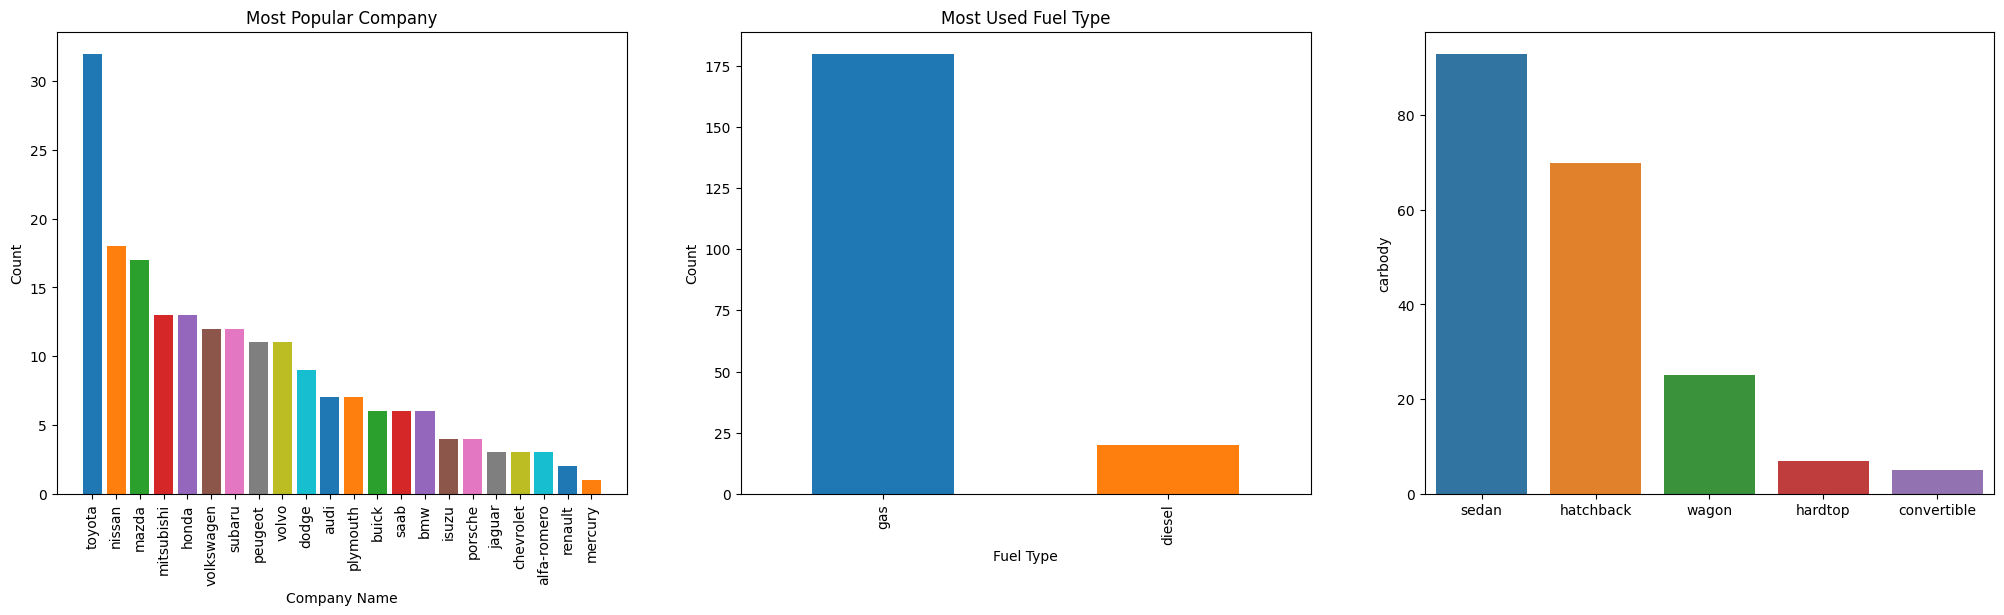

In [2211]:
plt.figure(figsize=(25,6))

# Example using MatplotLib
plt.subplot(1,3,1)
count_cars = df["CompanyName"].value_counts()
plt.bar(count_cars.index, count_cars, color=mcolors.TABLEAU_COLORS)
plt.xticks(rotation=90)
plt.title("Most Popular Company")
plt.xlabel("Company Name")
plt.ylabel("Count")

#Example using Pandas
plt.subplot(1,3,2)
df.fueltype.value_counts().plot(kind='bar', color=mcolors.TABLEAU_COLORS)
plt.title("Most Used Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")

#Example using seaborn

plt.subplot(1,3,3)
count_body_type = df["carbody"].value_counts()
sns.barplot(x=list(count_body_type.index),y=count_body_type)

### Conclusion
<ol>
    <li> Toyota is seems to be the most used car </li>
    <li> Fuel type is mostly gas </li>
    <li> Most common car body type is sedan </li>
</ol>

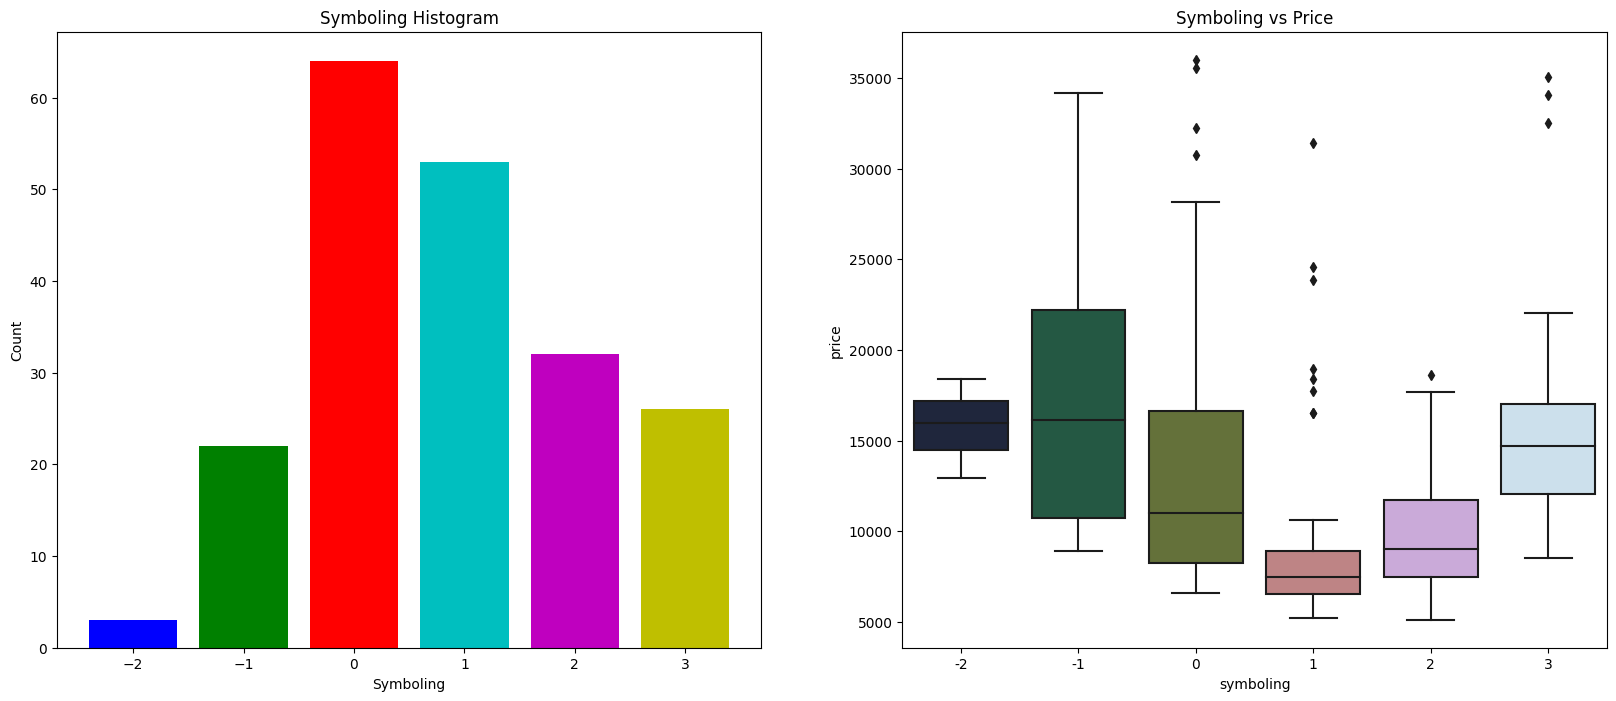

In [2212]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
count_symboling = df.groupby("symboling").count().iloc[:,1]

plt.bar(count_symboling.index,count_symboling,color=mcolors.BASE_COLORS)

plt.title("Symboling Histogram")
plt.xlabel("Symboling")
plt.xticks(rotation=0)
plt.ylabel("Count")


plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

### Conclusion
<ol>
    <li> The most sold symboling are 0 and 1 </li>
    <li> If we don't concider the outliers, the most cheapest cars are the ones with symboling <strong> 1 </strong> and the symbolings where the price of the car varies the most and is the most expensive is -1 (again without counting outliers)

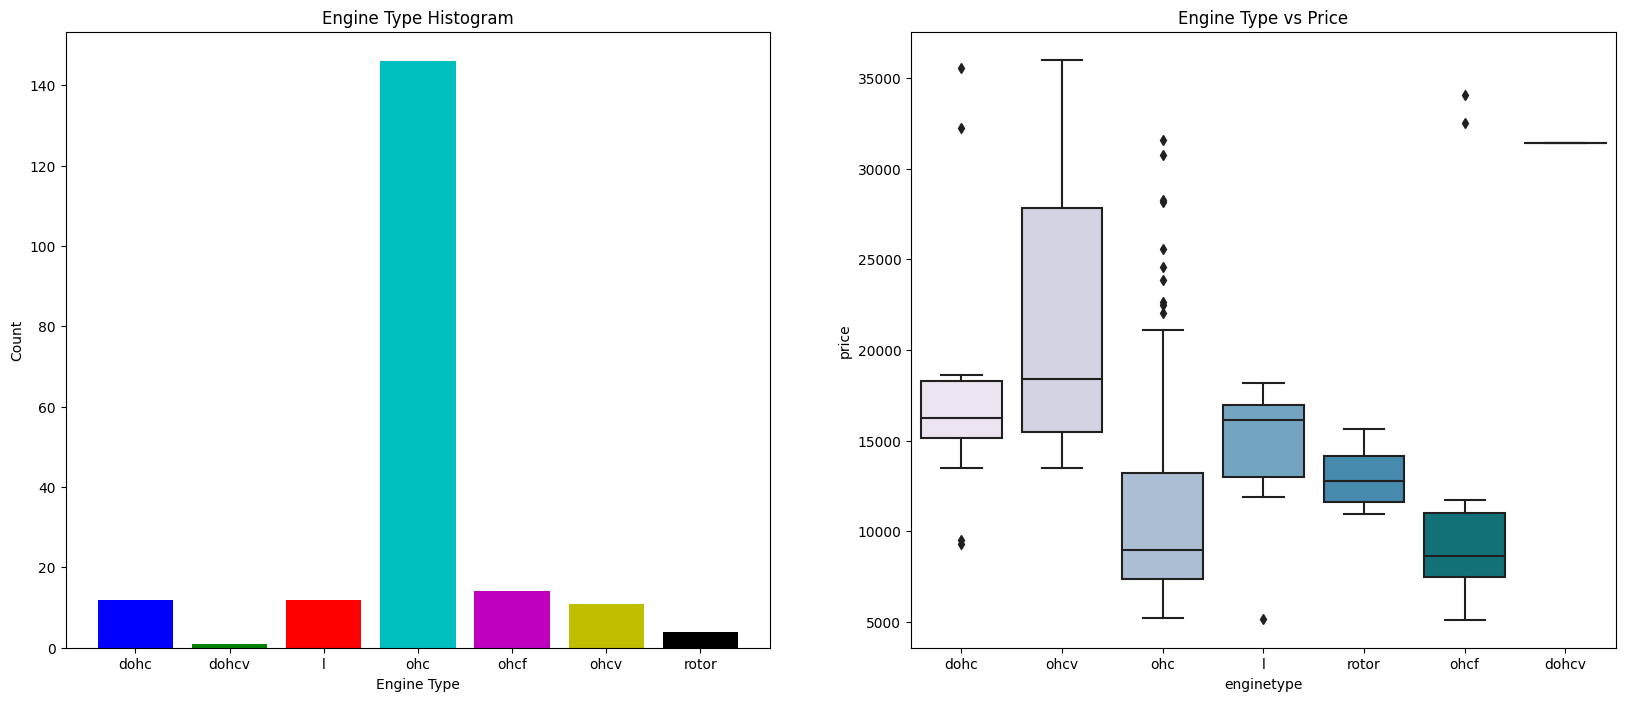

In [2213]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
count_engine = df.groupby("enginetype").count().iloc[:,1]
plt.bar(count_engine.index,count_engine,color=mcolors.BASE_COLORS)
plt.title("Engine Type Histogram")
plt.xlabel("Engine Type")
plt.xticks(rotation=0)
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price, palette=("PuBuGn"))

plt.show()

### Conclusion

<ol>
    <li> <strong>ohc</strong> is the most popular engine type </li>
    <li> the most expensive engine type is <strong>dohcv and ohcv </strong>, but the <strong>dohcv </strong> is expensive but a small amount of car use it </li>
</ol>

We cab see that there is a relation between the price and the enginetype and that the most commonly used engine type is the cheapest

<AxesSubplot: xlabel='CompanyName'>

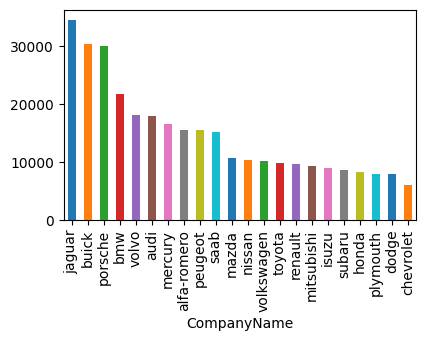

In [2214]:
plt.figure(figsize=(10,6))
avg_carcompany = df.groupby("CompanyName").mean().loc[:,"price"].sort_values(ascending=False)
plt.subplot(2,2,1)
avg_carcompany.plot(kind="bar", color=mcolors.TABLEAU_COLORS)

### I want to compare the avg price of cars vs engine type used by company (Just testing some stuff)

In [2215]:
total_cars_per_company = df.groupby("CompanyName").count().iloc[:,0]

In [2216]:
engtype_per_company = df.groupby(["CompanyName","enginetype"]).count().iloc[:,0]
list_company = list(df["CompanyName"].unique())

In [2217]:
percentage_engine_per_company = {}
for i in range(len(list_company)):
    company = list_company[i]
    mask = engtype_per_company.index.get_level_values(0) == list_company[i]
    filtered_data = engtype_per_company[mask]
    values = dict(filtered_data.apply(lambda x:x/total_cars_per_company.loc[company]))
    for keys,v in values.items():
        percentage_engine_per_company[keys] = [v]

In [2218]:
df_percentage = pd.DataFrame(percentage_engine_per_company).transpose()

In [2219]:
df_percentage = df_percentage.reset_index(level=1)

df_percentage = df_percentage.rename(columns={"level_0":"CompanyName"})
df_percentage = df_percentage.rename(columns={"level_1":"engine_type", 0:"percentage"})


In [2220]:
price_company = df.groupby("CompanyName").mean()["price"].sort_values(ascending=False)

In [2221]:
def plot_engine_perc(company):
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    price_company.plot(kind="bar",color=mcolors.TABLEAU_COLORS)
    
    plt.subplot(2,1,2)
    perc_df = df_percentage[df_percentage.index ==company]
    sns.barplot(x=perc_df.index, y=perc_df["percentage"], hue=perc_df["engine_type"])
    plt.tight_layout()
    
    


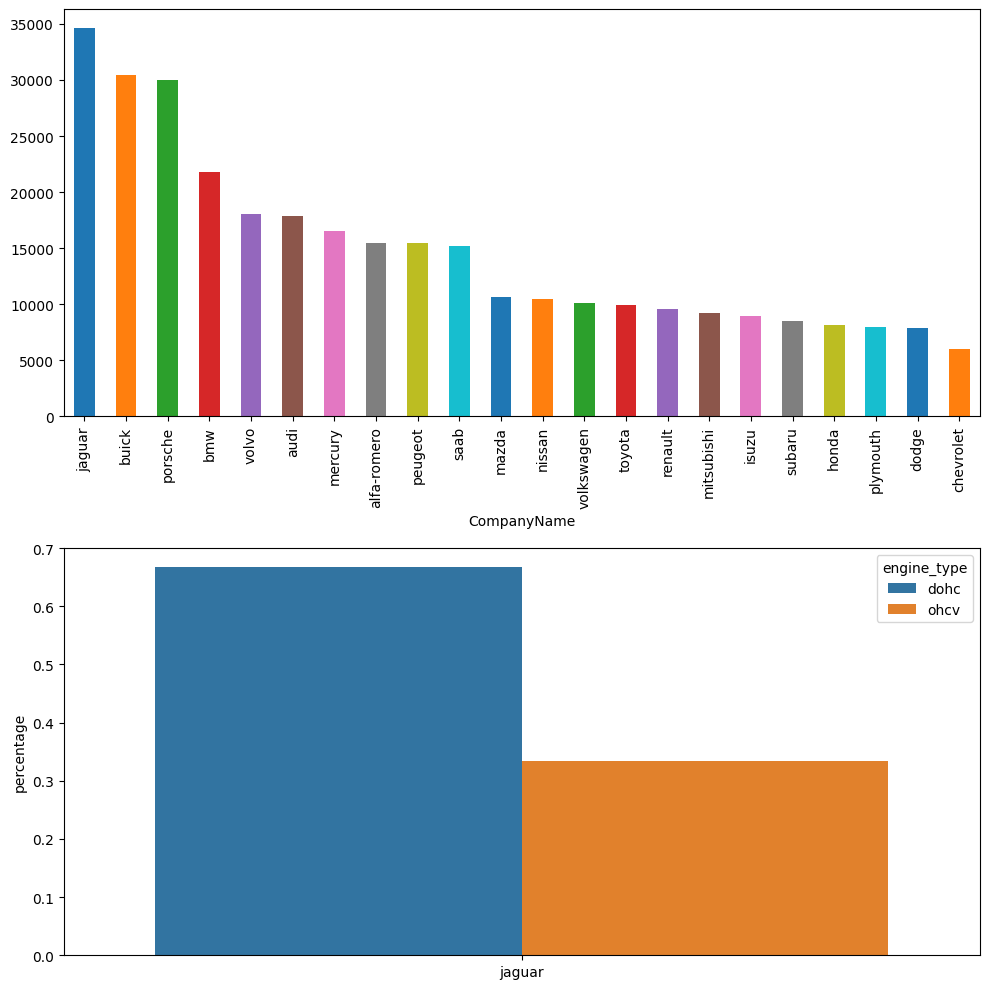

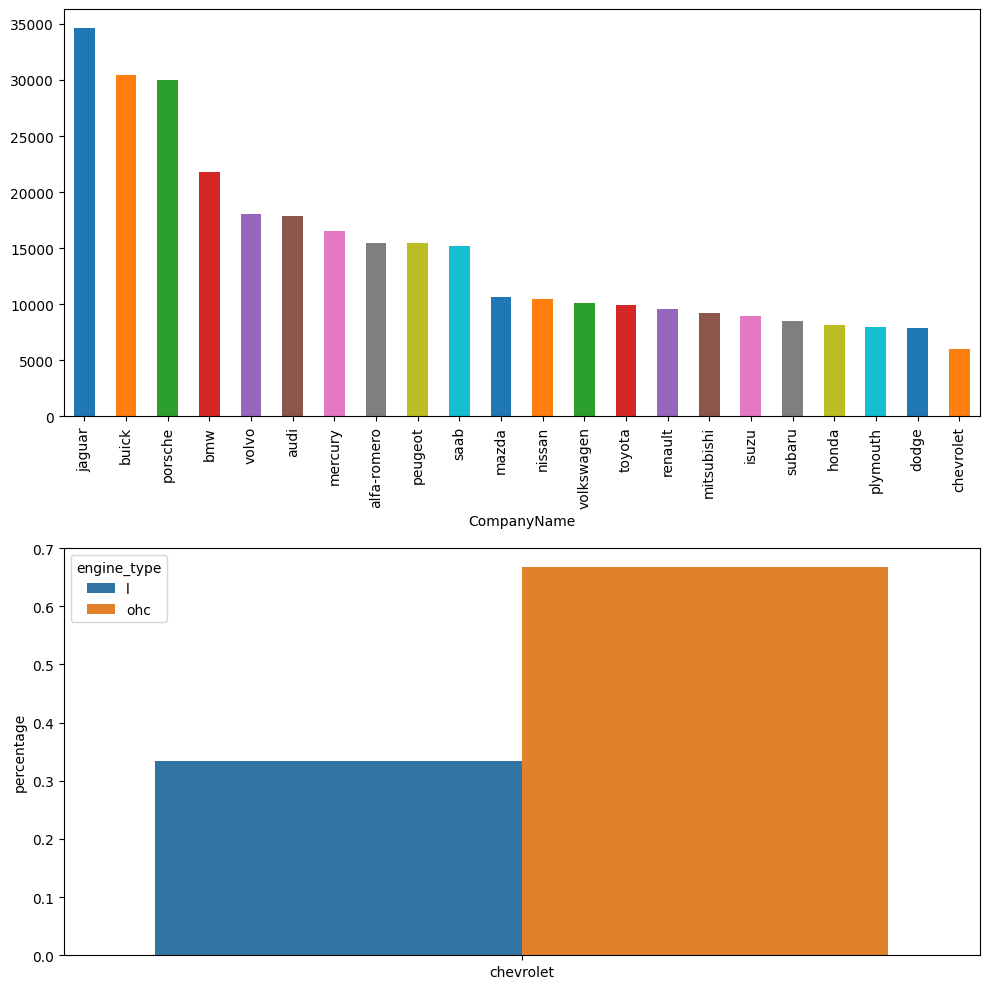

In [2222]:
plot_engine_perc("jaguar")
plot_engine_perc("chevrolet")

Chevrolet uses l and ohc, while jaguar uses dohc ohcv

##  Price vs columns

Above was just some analytical steps that we can use to analyze our data and get a better understanding of what we are dealing with, for example the most popular company is toyota and the most used car body type is sedan

Now I will compare each column with the average price, to see if there is a relation between them, which column has a real impact on the price

In [2223]:
col = df.columns
col

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

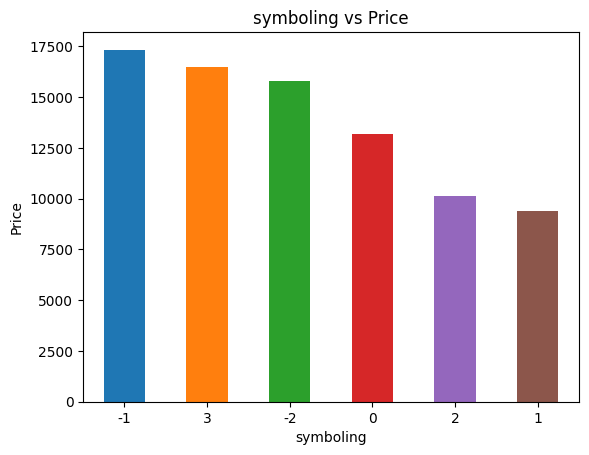

In [2224]:
col_i="symboling"
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar",color=mcolors.TABLEAU_COLORS)
plt.xticks(rotation=0)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)
plt.show()


Symboling isn't a good indicator, usually a symboling of 3 means that the car is at a higher risk (the worst)

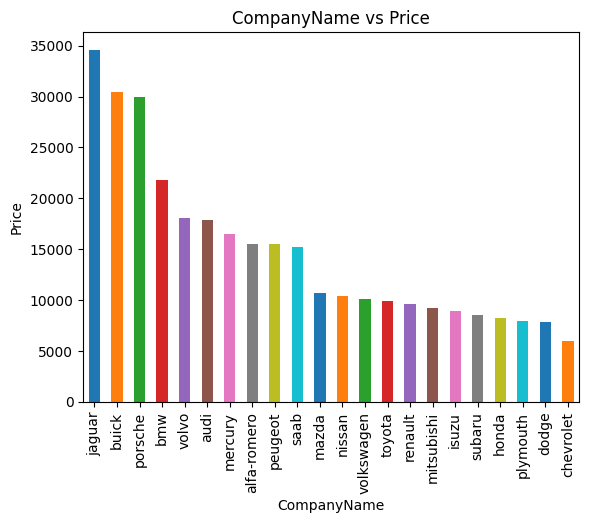

In [2225]:
col_i="CompanyName"
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar",color=mcolors.TABLEAU_COLORS)
plt.xticks(rotation=90)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)
plt.show()

Our goal is to find if a new company name, with specific features can integrated the market, name won't be a good indicator if it will generate profit or not

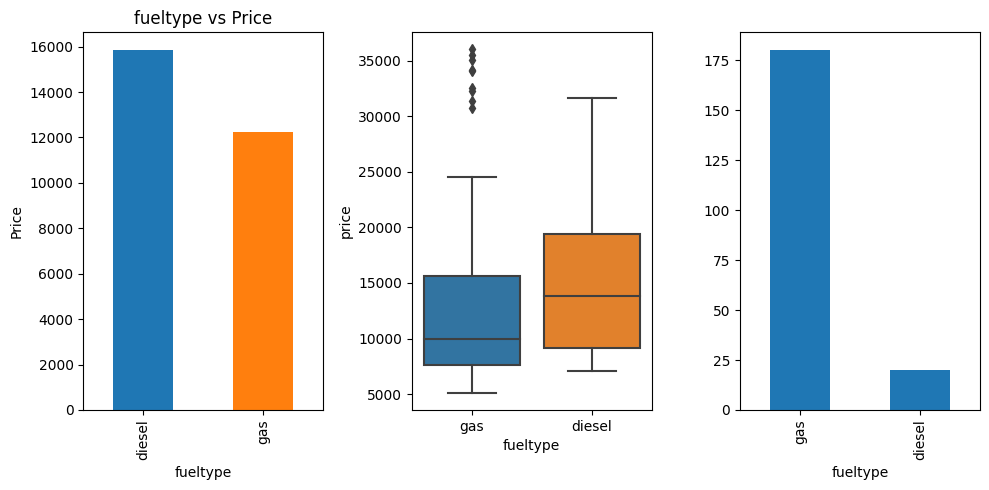

In [2226]:
col_i="fueltype"
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar",color=mcolors.TABLEAU_COLORS)
plt.xticks(rotation=90)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)

plt.subplot(1,3,2)
sns.boxplot(x=df[col_i],y=df["price"])


plt.subplot(1,3,3)
count = df.groupby(col_i).count().iloc[:,0].sort_values(ascending=False)
count.plot(kind="bar")
plt.tight_layout()

In general fuel type is a good indicator to evaluate the price of the car, but can we find better ?

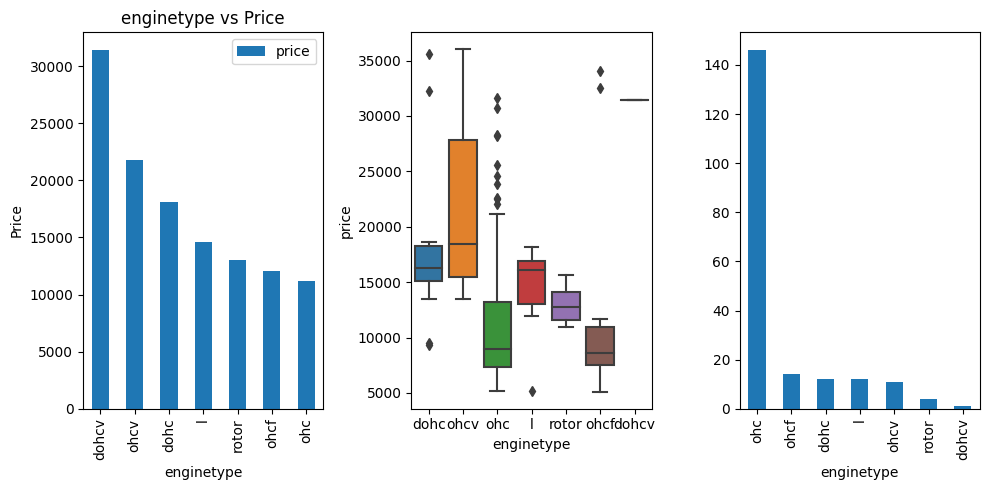

In [2227]:
col_i="enginetype"
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(x=df[col_i],y=df["price"])


plt.subplot(1,3,3)
count = df.groupby(col_i).count().iloc[:,0].sort_values(ascending=False)
count.plot(kind="bar")
plt.tight_layout()

Engine type is a good indicator of the price, we can see that the most expensive engine is <strong> dohcv </strong> and the cheapest one is <strong> ohc </strong> even if there is outliers, the median of ohc is lower than the resst, most of the values are located around it

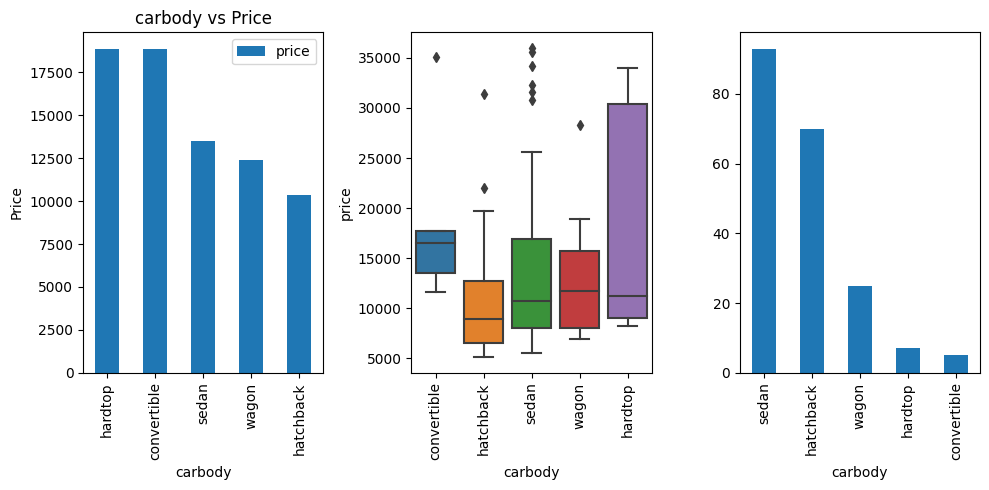

In [2228]:
col_i="carbody"
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(x=df[col_i],y=df["price"])
plt.xticks(rotation=90)


plt.subplot(1,3,3)
count = df.groupby(col_i).count().iloc[:,0].sort_values(ascending=False)
count.plot(kind="bar")
plt.tight_layout()

$\checkmark$ carbody

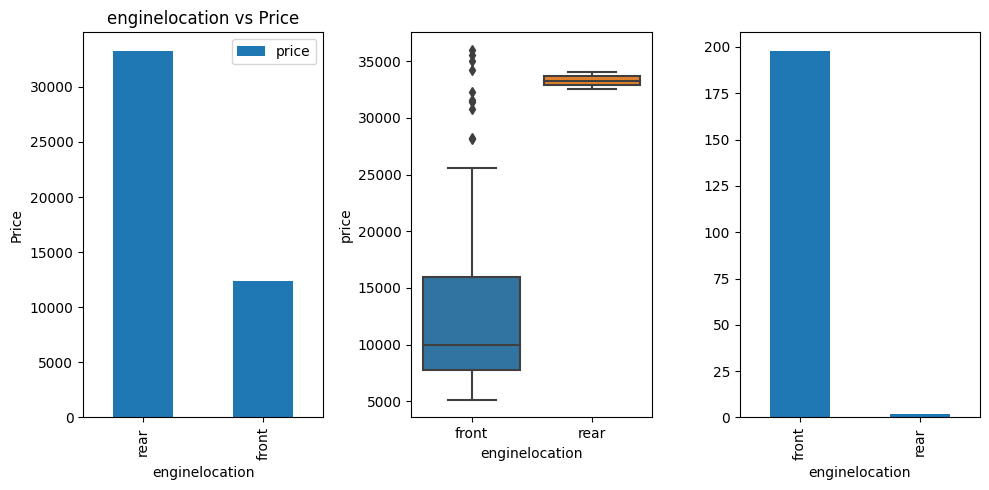

In [2229]:
col_i="enginelocation"
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(x=df[col_i],y=df["price"])




plt.subplot(1,3,3)
count = df.groupby(col_i).count().iloc[:,0].sort_values(ascending=False)
count.plot(kind="bar")
plt.tight_layout()


$\checkmark$ enginelocation

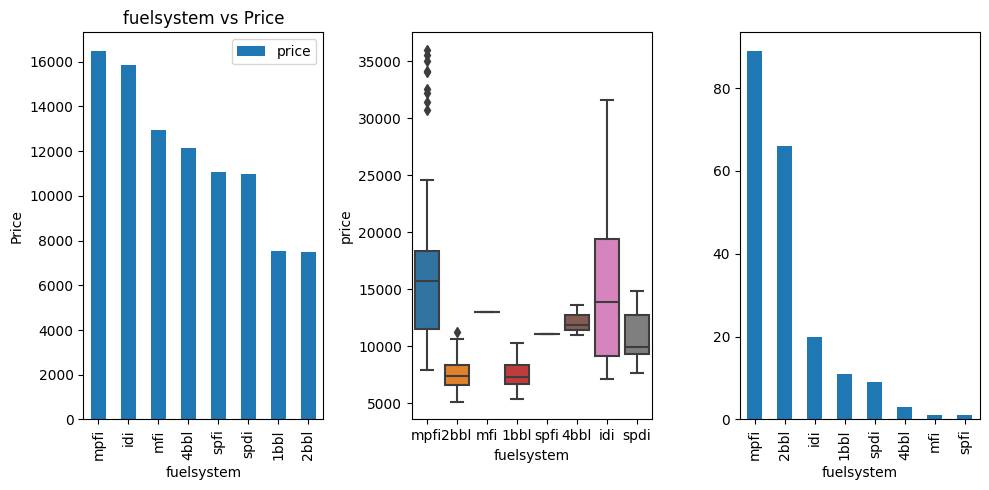

In [2230]:
col_i="fuelsystem"
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(x=df[col_i],y=df["price"])


plt.subplot(1,3,3)
count = df.groupby(col_i).count().iloc[:,0].sort_values(ascending=False)
count.plot(kind="bar")
plt.tight_layout()

x fuelsystem

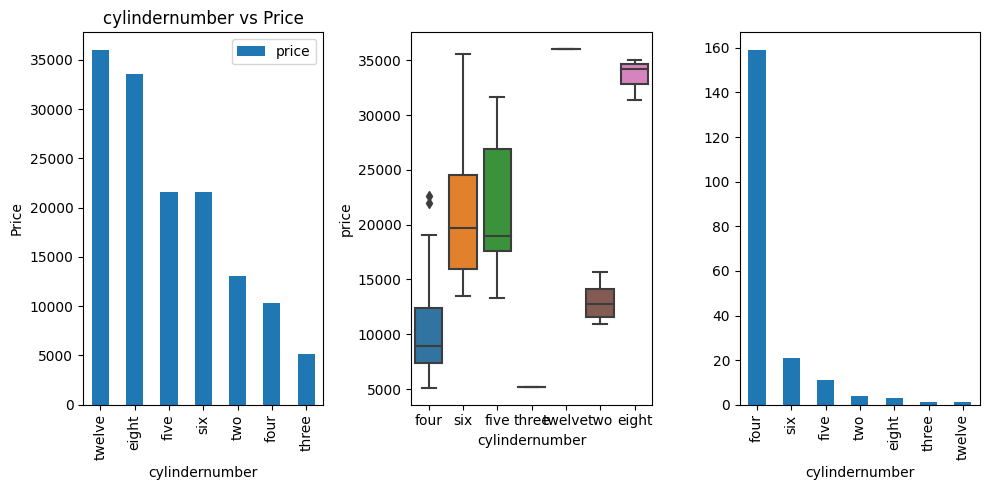

In [2231]:
col_i="cylindernumber"
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(x=df[col_i],y=df["price"])

plt.subplot(1,3,3)
count = df.groupby(col_i).count().iloc[:,0].sort_values(ascending=False)
count.plot(kind="bar")

plt.tight_layout()

$\checkmark$ cylindernumber

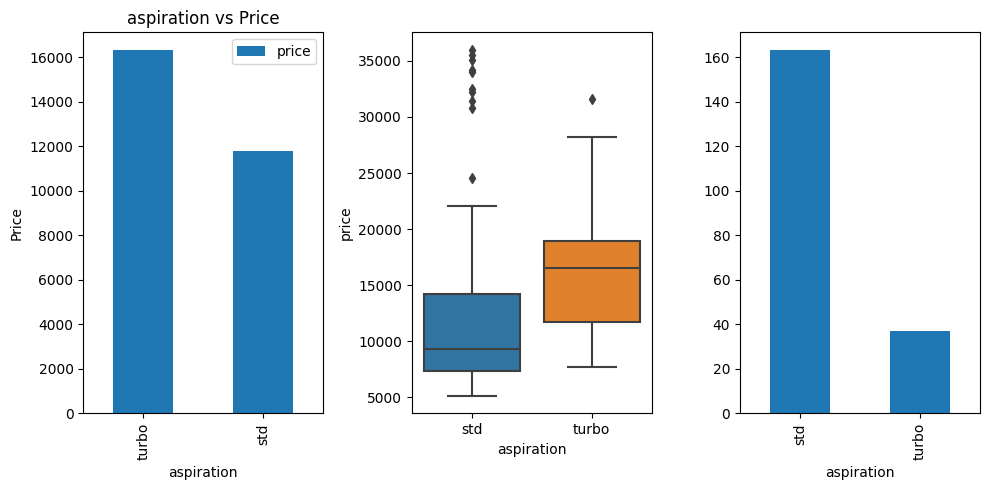

In [2232]:
col_i="aspiration"
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(x=df[col_i],y=df["price"])


plt.subplot(1,3,3)
count = df.groupby(col_i).count().iloc[:,0].sort_values(ascending=False)
count.plot(kind="bar")
plt.tight_layout()

$\checkmark$ aspiration

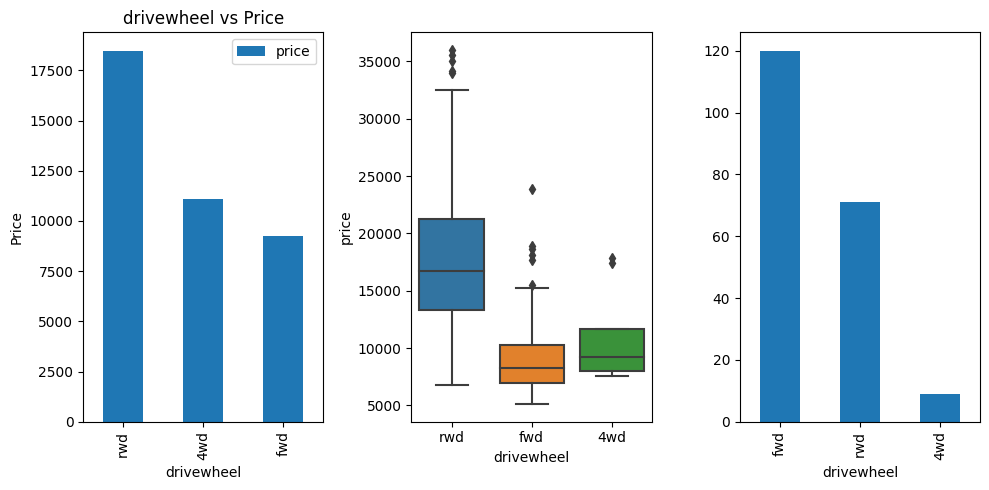

In [2233]:
col_i="drivewheel"
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(x=df[col_i],y=df["price"])


plt.subplot(1,3,3)
count = df.groupby(col_i).count().iloc[:,0].sort_values(ascending=False)
count.plot(kind="bar")
plt.tight_layout()

$\checkmark$ drivewheel

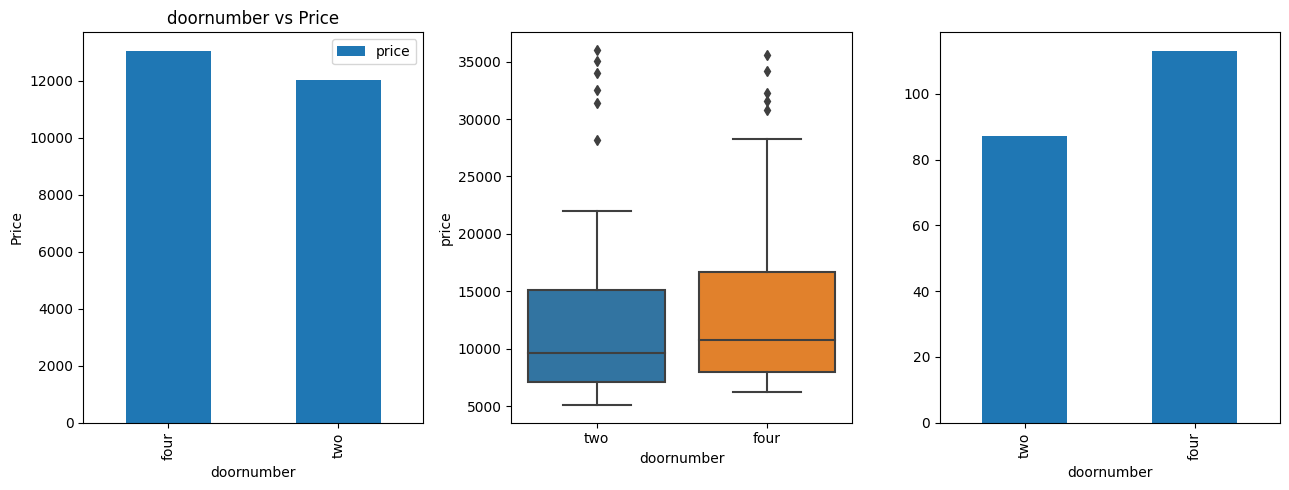

In [2234]:
col_i="doornumber"
plt.figure(figsize=(13,5))
plt.subplot(1,3,1)
group_by_col = df.groupby(col_i).mean()["price"].sort_values(ascending=False)
group_by_col.plot(kind="bar")
plt.xticks(rotation=90)
plt.xlabel(col_i)
plt.ylabel("Price")
title = col_i + " vs Price"
plt.title(title)
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(x=df[col_i],y=df["price"])

plt.subplot(1,3,3)
count = df.groupby(col_i).count().iloc[:,0].sort_values()
count.plot(kind="bar")

plt.tight_layout()

x doornumber (the price doesn't vary much depending on the number of doors

### Conclusion
From the cateogircal data I will choose 
<ul>
    <li> to keep </li>
    <ul>
        <li> carbody </li>
        <li> enginelocation </li>
        <li> aspiration </li>
        <li> drivewheel </li>
        <li> fueltype </li>
        <li> enginetype </li>
    </ul>
</ul>

<ul>
    <li> to drop </li>
    <ul>
        <li> doornumber </li>
        <li> cylindernumber </li>
        <li> fuelsystem </li>
        <li> CompanyName </li>
        <li> symboling </li>
    </ul>
</ul>



In [2235]:
cat_col_to_drop = ["doornumber","fuelsystem","CompanyName","symboling"]
cat_col_to_keep = ["carbody","enginelocation","aspiration","drivewheel","cylindernumber","fueltype","enginetype"]

In [2236]:
df_num = df.drop(columns=cat_col_to_drop)
df_num = df_num.drop(columns=cat_col_to_keep)

### Analysis of Numerical data

We want to find features that have a correlation with price, if price increase while feature increase it's a positive correlation, else it's a negative correlation

List of numerical data: 

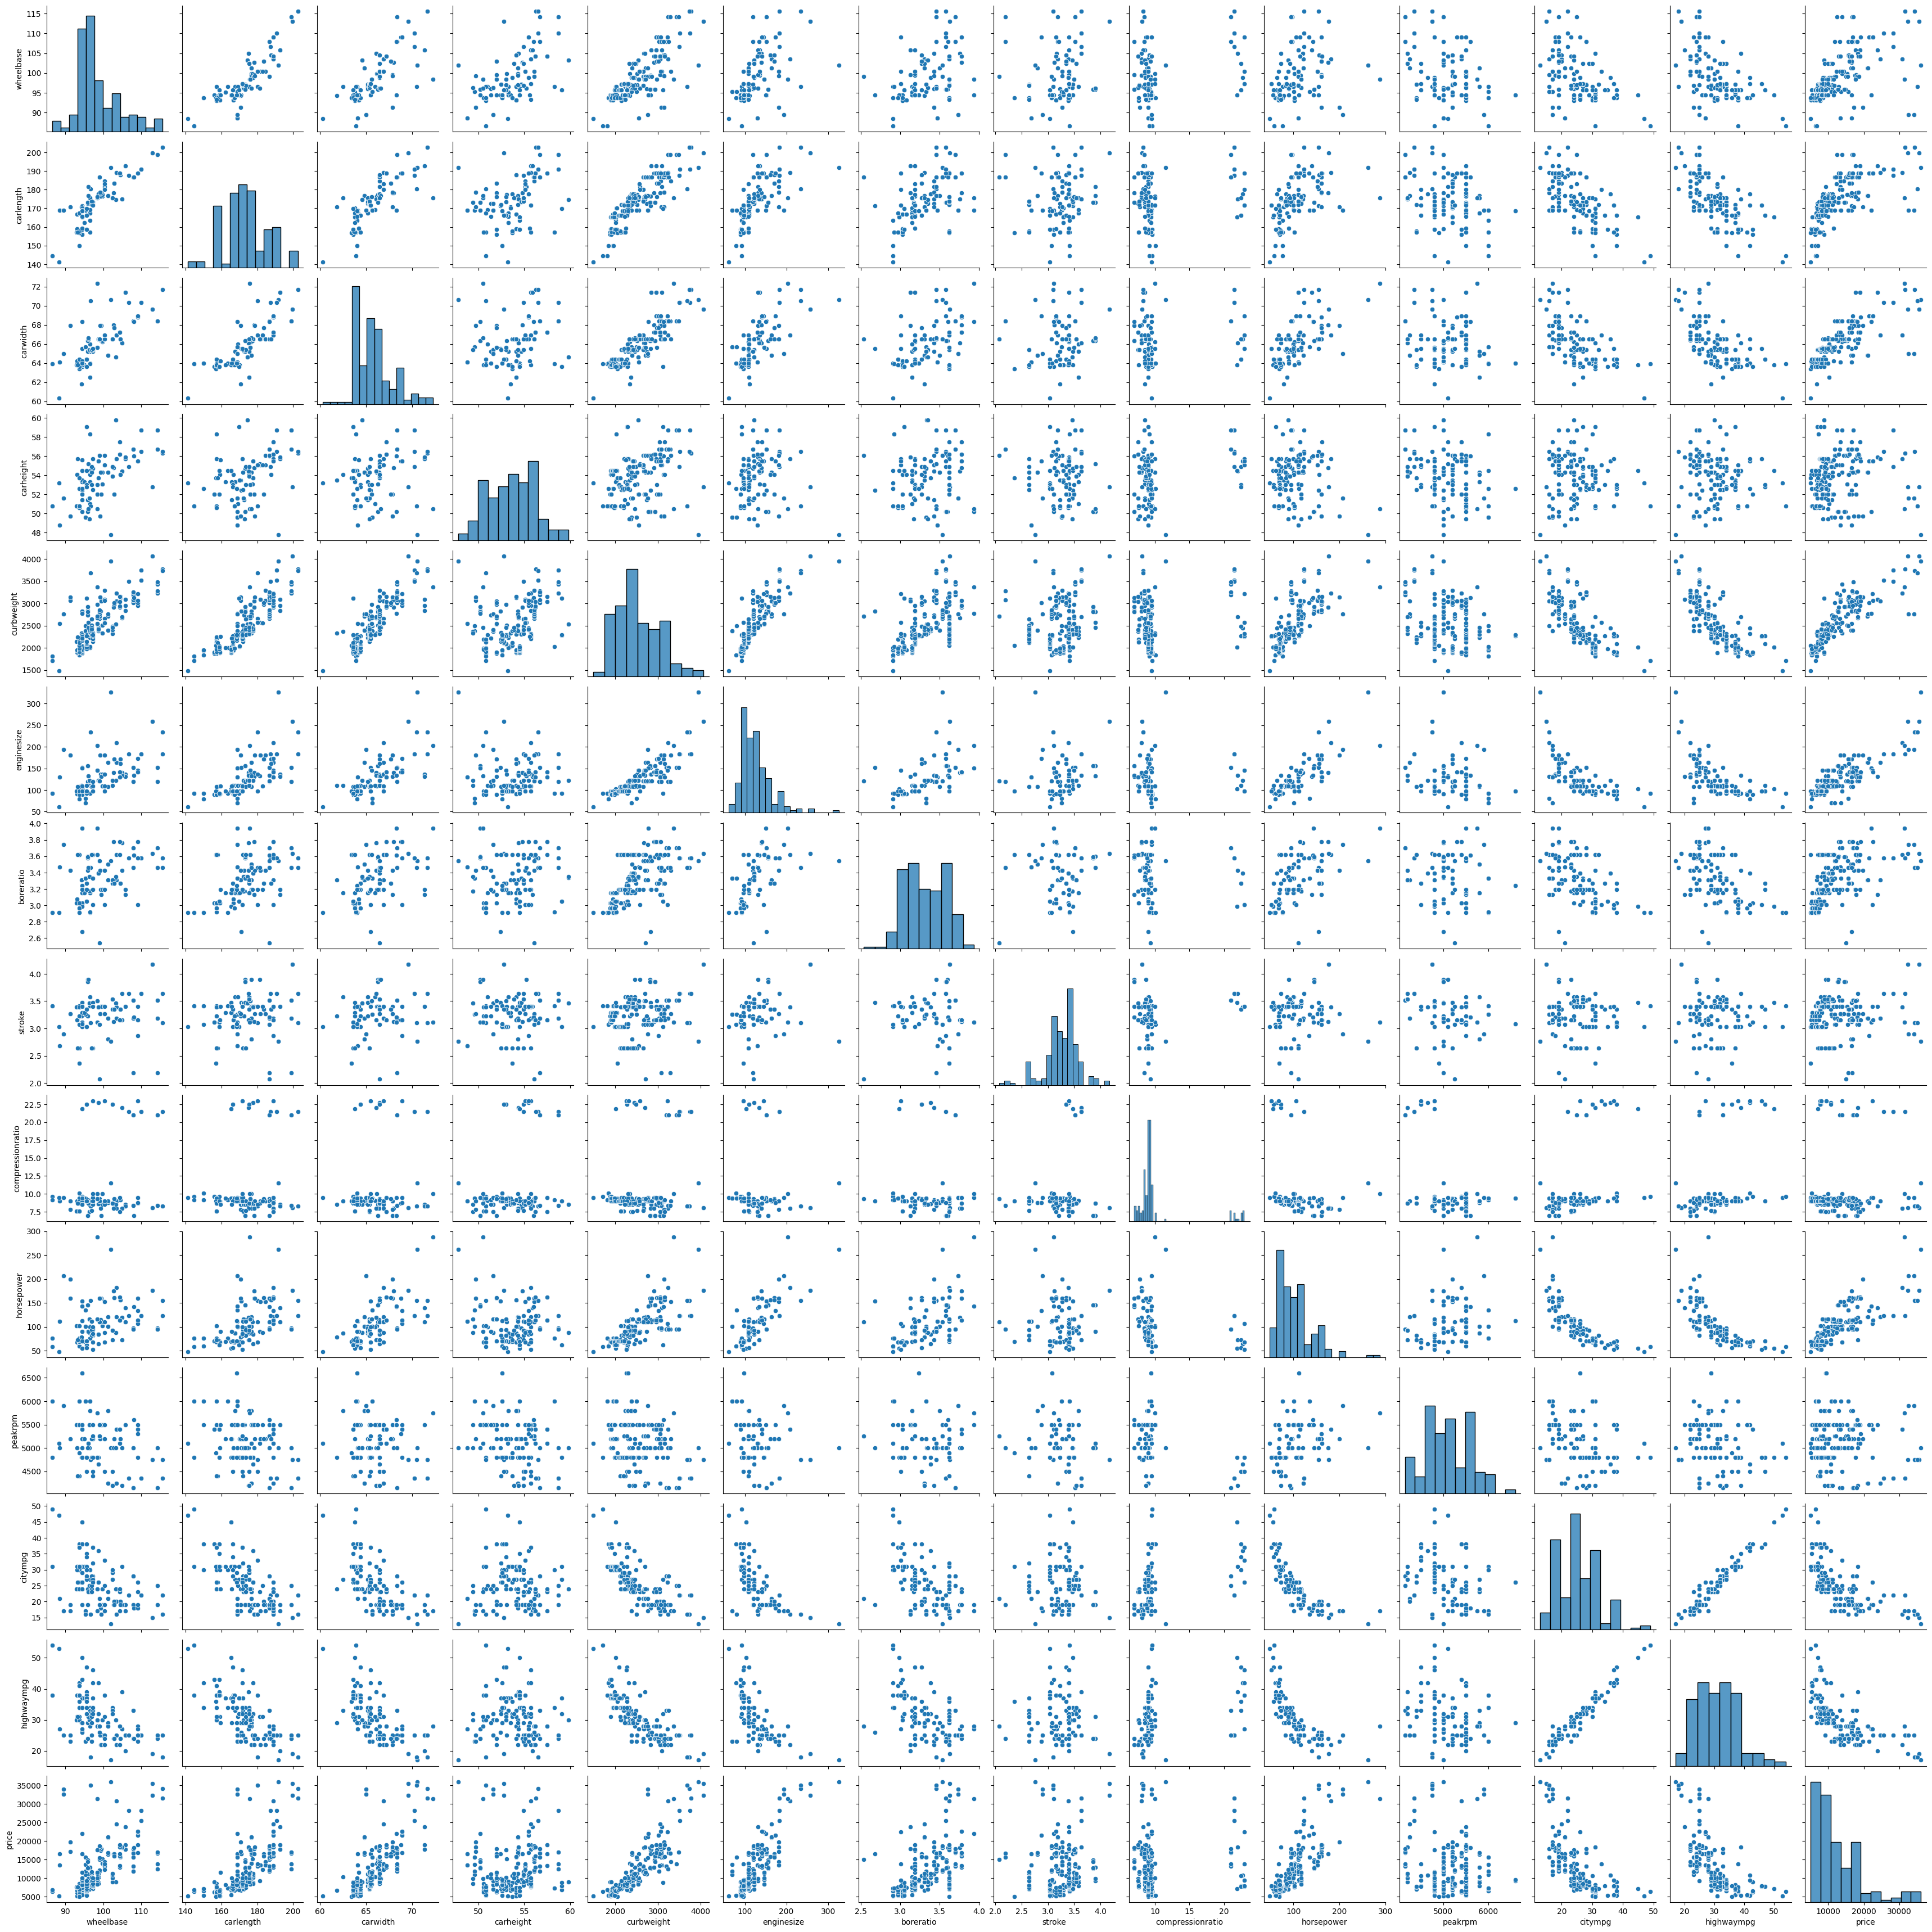

In [2237]:
sns.pairplot(df_num)
plt.show()

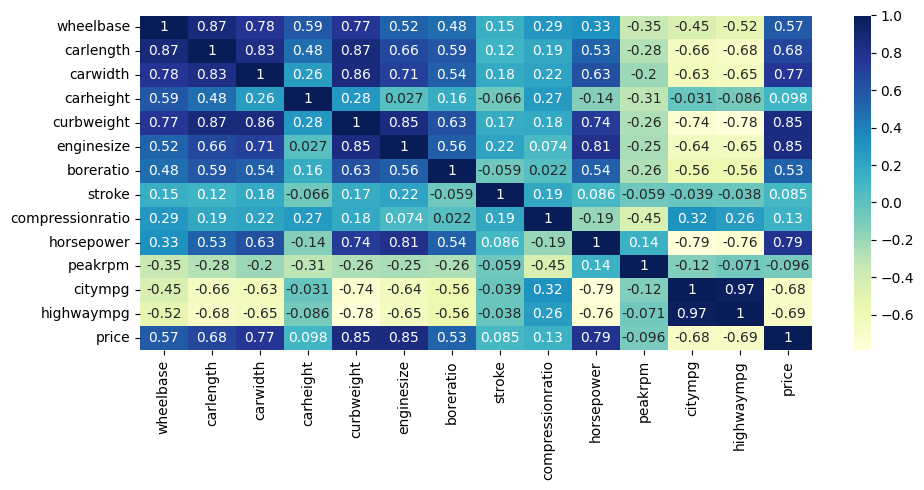

In [2238]:
plt.figure(figsize=(10,5))
sns.heatmap(df_num.corr(), annot = True, cmap="YlGnBu")
plt.tight_layout()

In [2239]:
num_col_to_keep = ["wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "horsepower", "citympg", "highwaympg","price"]

In [2250]:
col_to_keep=[]

for x in cat_col_to_keep:
    col_to_keep.append(x)
    
    
for x in num_col_to_keep:
    col_to_keep.append(x)
    
df = df.loc[:,col_to_keep]
df = df.sample(frac=1)

### Train test val split

In [2251]:
def split(df):   
    Y = df["price"]
    X = df.iloc[:,:-1]
    x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    return (x_train, x_test, y_train, y_test)

### Feature engineering (sklearn)

In [2252]:
def one_hot_encoder_fit(df,cat_col_to_keep):
    encoder = OneHotEncoder(handle_unknown='infrequent_if_exist',sparse=False)
    encoder.fit(df[cat_col_to_keep])
    joblib.dump(encoder,"../model/encoder")

In [2253]:
def one_hot_encoder_transform(df,cat_col_to_keep):
    encoder = joblib.load("../model/encoder")
    result = encoder.transform(df[cat_col_to_keep])
    df = df.drop(cat_col_to_keep,axis=1)
    df[encoder.get_feature_names_out()] = result
    return df


In [2254]:
def scaler_fit(df):
    scaler = Normalizer()
    scaler.fit(df)
    joblib.dump(scaler,"../model/scaler")



In [2255]:
def scaler_transform(df):
    scaler = joblib.load("../model/scaler")
    result = scaler.transform(df)
    df.iloc[:,:] = result
    return df
    

In [2256]:
def build_model(x_train,y_train):
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    joblib.dump(lr,"../model/lr")

In [2257]:
def score_model(x_test, y_test):
    lr = joblib.load("../model/lr")
    score = lr.score(x_test, y_test)
    return score

In [2258]:
def pipeline(df):
    cat_col_to_keep = ["carbody","enginelocation","aspiration","drivewheel","cylindernumber","fueltype","enginetype"]
    (x_train, x_test, y_train, y_test) = split(df)
    one_hot_encoder_fit(x_train,cat_col_to_keep)
    x_train = one_hot_encoder_transform(x_train,cat_col_to_keep)
    scaler_fit(x_train)
    x_train = scaler_transform(x_train)
    x_test = one_hot_encoder_transform(x_test,cat_col_to_keep)
    x_test = scaler_transform(x_test)
    build_model(x_train,y_train)
    score = score_model(x_test, y_test)
    return score
    
    

In [2259]:
pipeline(df)

0.8483199930386884

In [2260]:
col_to_keep

['carbody',
 'enginelocation',
 'aspiration',
 'drivewheel',
 'cylindernumber',
 'fueltype',
 'enginetype',
 'wheelbase',
 'carlength',
 'carwidth',
 'curbweight',
 'enginesize',
 'horsepower',
 'citympg',
 'highwaympg',
 'price']